In [15]:
# fit a simple mlp model on the haberman and review learning curves
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from keras.models import Model
from matplotlib import pyplot

In [16]:
# load the haberman dataset and summarize the shape
from pandas import read_csv
# define the location of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
# load the dataset
df = read_csv(url, header=None)
# summarize shape
print(df.shape)

(306, 4)


                0           1           2           3
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


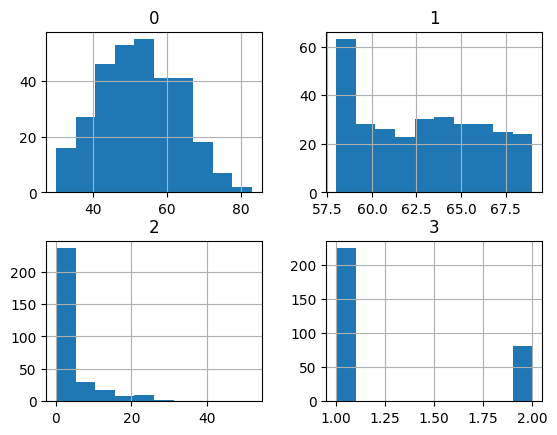

In [17]:
# show summary statistics and plots of the haberman dataset
from pandas import read_csv
from matplotlib import pyplot
# define the location of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
# load the dataset
df = read_csv(url, header=None)
# show summary statistics
print(df.describe())
# plot histograms
df.hist()
pyplot.show()

In [18]:
# summarize the class ratio of the haberman dataset
from pandas import read_csv
from collections import Counter
# define the location of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
# define the dataset column names
columns = ['age', 'year', 'nodes', 'class']
# load the csv file as a data frame
dataframe = read_csv(url, header=None, names=columns)
# summarize the class distribution
target = dataframe['class'].values
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=225, Percentage=73.529%
Class=2, Count=81, Percentage=26.471%


In [19]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
df = read_csv(path, header=None)

In [20]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=3)
# determine the number of input features
n_features = X.shape[1]

In [21]:
# Define the input shape
input_layer = Input(shape=(n_features,))

# Use the input layer in the first Dense layer
dense1 = Dense(10, activation='relu', kernel_initializer='he_normal')(input_layer)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_test,y_test))

In [22]:
# Use the model.predict() method to get probabilities
yhat_probs = model.predict(X_test)

yhat = (yhat_probs > 0.5).astype('int32')

# Evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Accuracy: 0.752


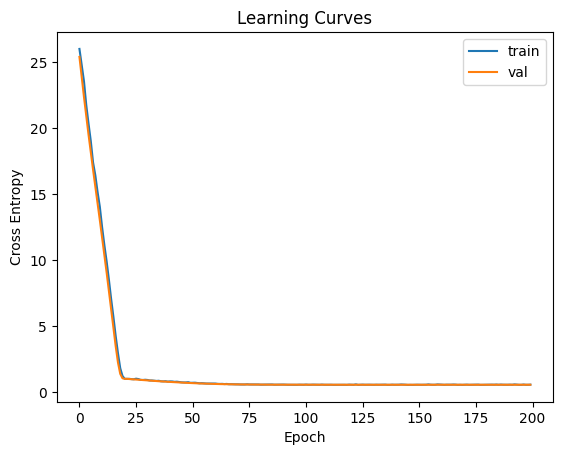

In [23]:
# Plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()